In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!wget --no-check-certificate \
    "https://github.com/thezidan2001/bottle_dataset_capstone/raw/main/bottle_dataset.zip" \
    -O "/tmp/bottle_dataset.zip"

local_zip = '/tmp/bottle_dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-05-25 14:05:01--  https://github.com/thezidan2001/bottle_dataset_capstone/raw/main/bottle_dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/thezidan2001/bottle_dataset_capstone/main/bottle_dataset.zip [following]
--2023-05-25 14:05:02--  https://raw.githubusercontent.com/thezidan2001/bottle_dataset_capstone/main/bottle_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80624929 (77M) [application/zip]
Saving to: ‘/tmp/bottle_dataset.zip’

/tmp/bottle_dataset 100%[===================>]  76.89M   235MB/s    in 0.3s    

2023-05-25 14:05:05 (235 MB/s) - ‘/tmp/bottle_datase

In [ ]:
source_path = '/tmp/dataImages'

source_path_bottle = os.path.join(source_path, 'water-bottle')
source_path_notbottle = os.path.join(source_path, 'not-water-bottle')

!find /tmp/dataImages/ -type f ! \( -name "*.jpeg" -o -name "*.png" -o -name "*.jpg" \) -exec rm {} +

print(f"There are {len(os.listdir(source_path_bottle))} images of Bottle.")
print(f"There are {len(os.listdir(source_path_notbottle))} images of Not Bottle.")

There are 630 images of Bottle.
There are 630 images of Not Bottle.


In [ ]:
root_dir = '/tmp/bottle-v-notbottle'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
 
  os.makedirs(root_path)
  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)

  train_bottles_dir = os.path.join(train_dir, 'bottles')
  os.makedirs(train_bottles_dir)
  train_notbottles_dir = os.path.join(train_dir, 'notbottles')
  os.makedirs(train_notbottles_dir)
  
  
  validation_bottles_dir = os.path.join(validation_dir, 'bottles')
  os.makedirs(validation_bottles_dir)
  validation_notbottles_dir = os.path.join(validation_dir, 'notbottles')
  os.makedirs(validation_notbottles_dir)
  
  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/bottle-v-notbottle/training
/tmp/bottle-v-notbottle/validation
/tmp/bottle-v-notbottle/training/bottles
/tmp/bottle-v-notbottle/training/notbottles
/tmp/bottle-v-notbottle/validation/bottles
/tmp/bottle-v-notbottle/validation/notbottles


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)
  pass

In [ ]:
BOTTLES_SOURCE_DIR = "/tmp/dataImages/water-bottle/"
NOTBOTTLES_SOURCE_DIR = "/tmp/dataImages/not-water-bottle/"

TRAINING_DIR = "/tmp/bottle-v-notbottle/training/"
VALIDATION_DIR = "/tmp/bottle-v-notbottle/validation/"

TRAINING_BOTTLES_DIR = os.path.join(TRAINING_DIR, "bottles/")
VALIDATION_BOTTLES_DIR = os.path.join(VALIDATION_DIR, "bottles/")

TRAINING_NOTBOTTLES_DIR = os.path.join(TRAINING_DIR, "notbottles/")
VALIDATION_NOTBOTTLES_DIR = os.path.join(VALIDATION_DIR, "notbottles/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BOTTLES_DIR)) > 0:
  for file in os.scandir(TRAINING_BOTTLES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NOTBOTTLES_DIR)) > 0:
  for file in os.scandir(TRAINING_NOTBOTTLES_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BOTTLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_BOTTLES_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_NOTBOTTLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_NOTBOTTLES_DIR):
    os.remove(file.path)

split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BOTTLES_SOURCE_DIR, TRAINING_BOTTLES_DIR, VALIDATION_BOTTLES_DIR, split_size)
split_data(NOTBOTTLES_SOURCE_DIR, TRAINING_NOTBOTTLES_DIR, VALIDATION_NOTBOTTLES_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal bottles's directory has {len(os.listdir(BOTTLES_SOURCE_DIR))} images")
print(f"Original notbottles's directory has {len(os.listdir(NOTBOTTLES_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BOTTLES_DIR))} images of bottles for training")
print(f"There are {len(os.listdir(TRAINING_NOTBOTTLES_DIR))} images of not bottles for training")
print(f"There are {len(os.listdir(VALIDATION_BOTTLES_DIR))} images of bottles for validation")
print(f"There are {len(os.listdir(VALIDATION_NOTBOTTLES_DIR))} images of not bottles for validation")



Original bottles's directory has 630 images
Original notbottles's directory has 630 images

There are 504 images of bottles for training
There are 504 images of not bottles for training
There are 126 images of bottles for validation
There are 126 images of not bottles for validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator( rescale=1./255,
                                      rotation_range=90,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='nearest'
                                     
    )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150,150))
  
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1008 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([ 
        ##tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        ##tf.keras.layers.MaxPooling2D(2, 2),
        ##tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        ##tf.keras.layers.MaxPooling2D(2,2),
        ##tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        ##tf.keras.layers.MaxPooling2D(2,2),
        ##tf.keras.layers.Flatten(),
        ##tf.keras.layers.Dense(1024, activation='relu'),
        ##tf.keras.layers.Dropout(0.2),
        InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])  

    return model


In [ ]:
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.layers import Input
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, 
                    epochs=20,  
                    verbose=1,
                    validation_data=validation_generator, 
                    callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 247s 7s/step - loss: 0.4688 - accuracy: 0.7778 - val_loss: 0.4242 - val_accuracy: 0.8532
Epoch 2/20
32/32 [==============================] - 227s 7s/step - loss: 0.2288 - accuracy: 0.9157 - val_loss: 0.2760 - val_accuracy: 0.8968
Epoch 3/20
32/32 [==============================] - 220s 7s/step - loss: 0.1817 - accuracy: 0.9276 - val_loss: 0.2449 - val_accuracy: 0.9206
Epoch 4/20
32/32 [==============================] - 219s 7s/step - loss: 0.1408 - accuracy: 0.9514 - val_loss: 0.2958 - val_accuracy: 0.9325
Epoch 5/20
32/32 [==============================] - 228s 7s/step - loss: 0.1345 - accuracy: 0.9544 - val_loss: 0.2756 - val_accuracy: 0.9246
Epoch 6/20
32/32 [==============================] - 230s 7s/step - loss: 0.1032 - accuracy: 0.9563 - val_loss: 0.5301 - val_accuracy: 0.9167
Epoch 7/20
32/32 [==============================] - 220s 7s/step - loss: 0.0833 - accuracy: 0.9613 - val_loss: 0.3841 - val_accuracy: 0.9365
Epoch 8/20
32

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve true labels
true_labels = validation_generator.labels

# Generate predicted labels
predicted_probabilities = model.predict(validation_generator)
predicted_labels = (predicted_probabilities > 0.5).astype(int).flatten()

# Create confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print(confusion_matrix)

# Calculate accuracy
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / np.sum(confusion_matrix)

# Calculate precision
precision = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

# Calculate recall
recall = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


8/8 [==============================] - 13s 1s/step
[[58 68]
 [58 68]]
Accuracy: 0.5
Precision: 0.4603174603174603
Recall: 0.5
F1-score: 0.4793388429752066


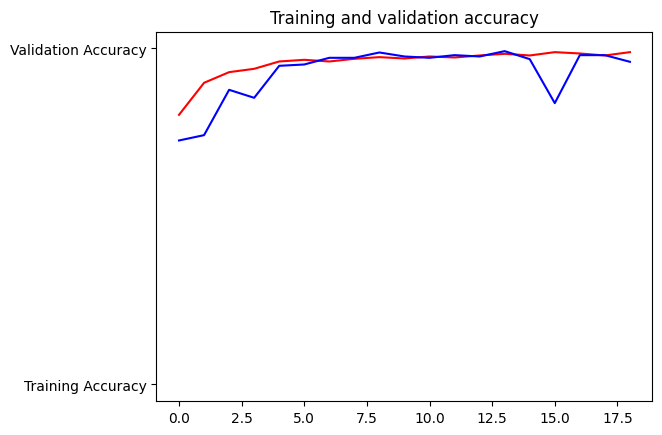

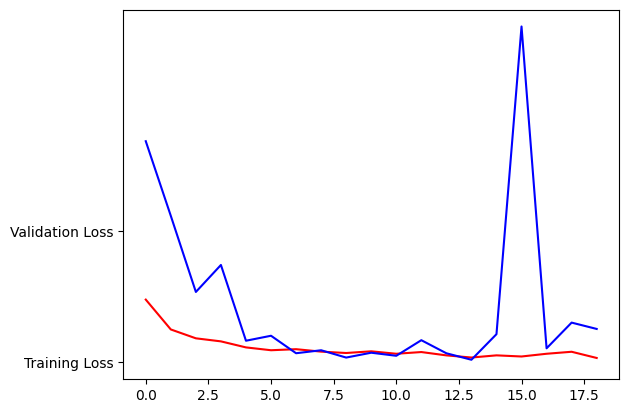

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

1/1 [==============================] - 0s 71ms/step


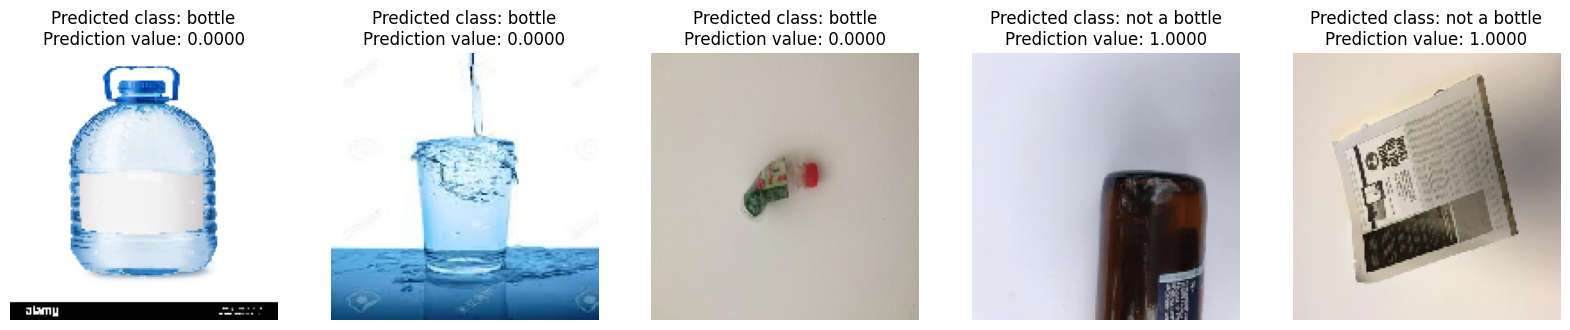

In [ ]:
# Get 3 random images from the VALIDATION_BOTTLES_DIR
bottle_image_paths = random.sample(os.listdir(VALIDATION_BOTTLES_DIR), 3)

# Get 2 random images from the VALIDATION_NOTBOTTLES_DIR
notbottle_image_paths = random.sample(os.listdir(VALIDATION_NOTBOTTLES_DIR), 2)

# Combine the image paths
random_image_paths = bottle_image_paths + notbottle_image_paths

# Create subplots to display the images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, image_path in enumerate(random_image_paths):
    # Determine the image directory based on the image path
    image_dir = VALIDATION_BOTTLES_DIR if image_path in bottle_image_paths else VALIDATION_NOTBOTTLES_DIR

    # Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(os.path.join(image_dir, image_path), target_size=(150, 150))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0

    # Make predictions using the trained model
    predictions = model.predict(image)
    prediction_value = predictions[0][0]
    predicted_class = "not a bottle" if prediction_value > 0.5 else "bottle"

    # Display the image, predicted class, and prediction value
    axes[i].imshow(image[0])
    axes[i].axis('off')
    axes[i].set_title(f"Predicted class: {predicted_class}\nPrediction value: {prediction_value:.4f}")

plt.show()
